## MNIST Classifier with KNeighborsClassifier

In [16]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from sklearn.datasets import fetch_openml

In [18]:
mnist = fetch_openml('mnist_784',as_frame=True)

In [19]:
mnist.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [20]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

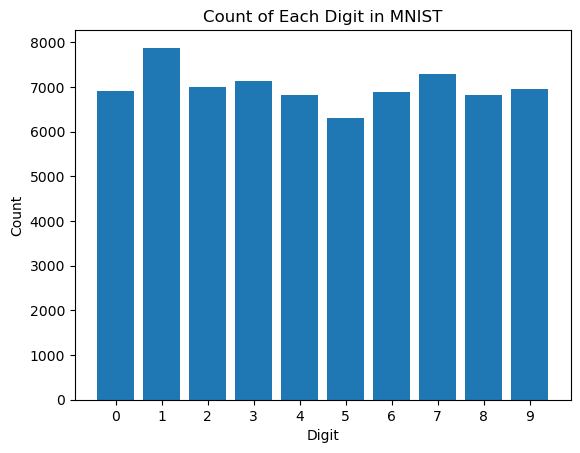

In [22]:
counts = mnist['target'].value_counts().sort_index()

plt.bar(counts.index, counts.values)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Count of Each Digit in MNIST')
plt.xticks(range(10))
plt.show()

In [23]:
X, y = mnist.data, mnist.target

In [24]:

def plot_digit(index):
    image = X.iloc[index].values.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {y.iloc[index]}")
    plt.axis('off')
    plt.show()

# --- Plot a grid of images ---
def plot_grid(n_rows=3, n_cols=5):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
    for i, ax in enumerate(axes.flat):
        image = X.iloc[i].values.reshape(28, 28)
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Label: {y.iloc[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()


# --- Plot one sample per digit (0-9) ---
def plot_one_per_class():
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    for digit, ax in zip(range(10), axes.flat):
        idx = y[y == str(digit)].index[0]   # y is string type from OpenML
        image = X.loc[idx].values.reshape(28, 28)
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Digit: {digit}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc_score = metrics.accuracy_score(y_test,y_pred)


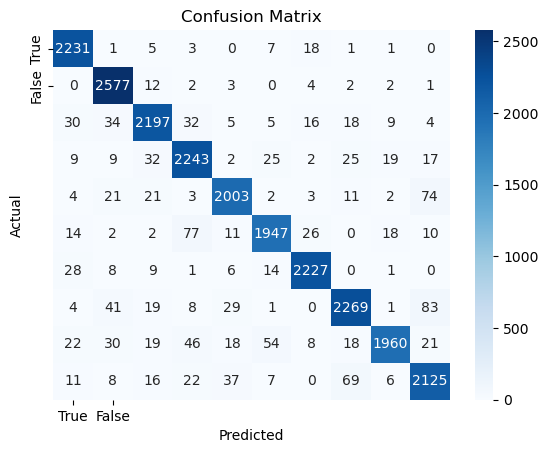

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["True", "False"],
            yticklabels=["True", "False"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [29]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2267
           1       0.94      0.99      0.97      2603
           2       0.94      0.93      0.94      2350
           3       0.92      0.94      0.93      2383
           4       0.95      0.93      0.94      2144
           5       0.94      0.92      0.93      2107
           6       0.97      0.97      0.97      2294
           7       0.94      0.92      0.93      2455
           8       0.97      0.89      0.93      2196
           9       0.91      0.92      0.92      2301

    accuracy                           0.94     23100
   macro avg       0.94      0.94      0.94     23100
weighted avg       0.94      0.94      0.94     23100



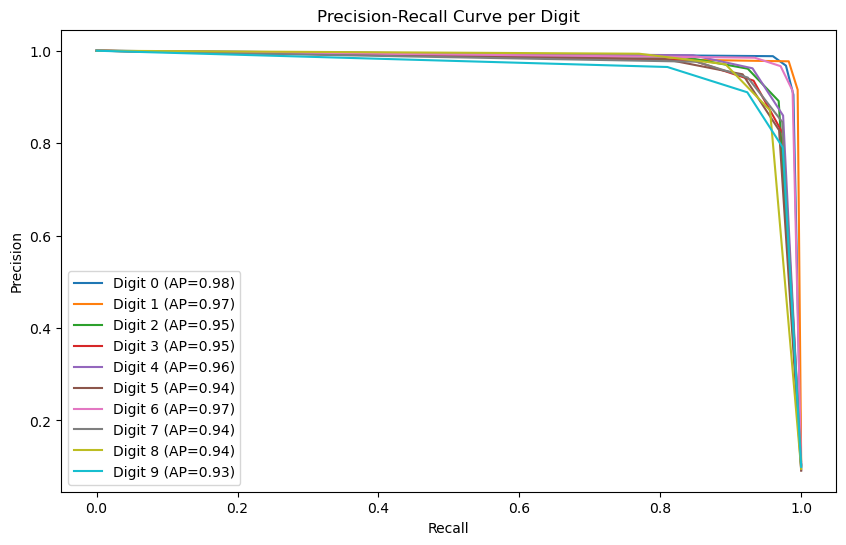

In [30]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

y_test_bin = label_binarize(y_test, classes=[str(i) for i in range(10)])

y_score = classifier.predict_proba(X_test)

plt.figure(figsize=(10, 6))
for i in range(10):
    prec, rec, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(rec, prec, label=f'Digit {i} (AP={average_precision_score(y_test_bin[:, i], y_score[:, i]):.2f})')

plt.title('Precision-Recall Curve per Digit')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()